<center><img src='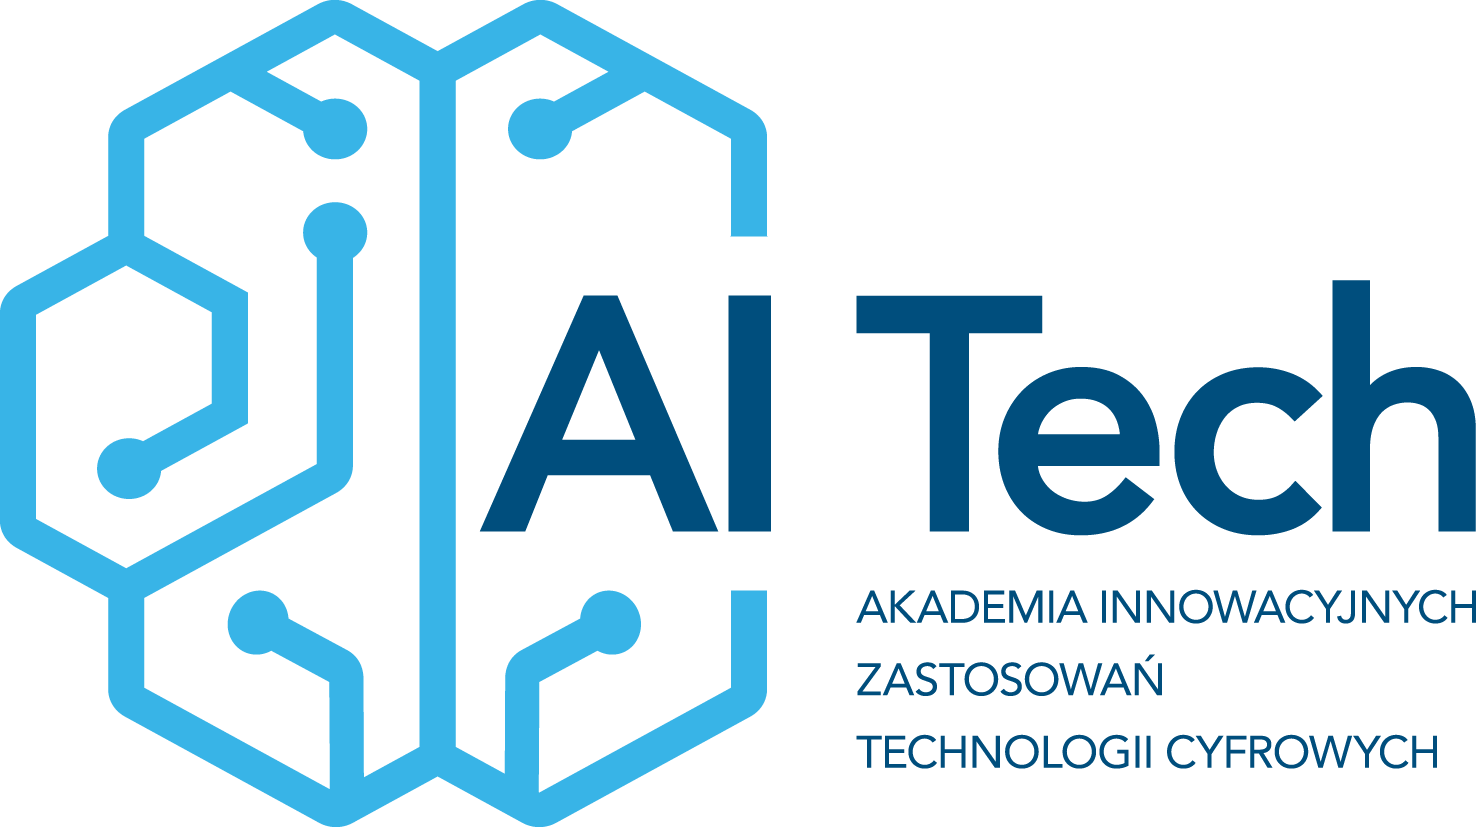
' height="60"></center>

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<center>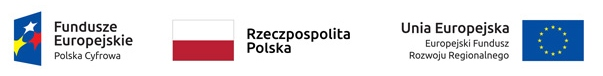</center>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

**Author: Jacek Sroka**




# ML in big scale - LAB 11




Hyperparameter tuning

* Grid search in Spark
* Optuna
* Distributing Optuna

## PySpark

### Pyspark installation

In [1]:
!pip install pyspark --quiet
!pip install pyspark[pandas_on_spark] plotly
!apt install openjdk-8-jdk-headless &> /dev/null
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

from pyspark.sql import SparkSession
spark = SparkSession.builder \
                    .master("local[*]") \
                    .appName("mlibs") \
                    .getOrCreate()

from pyspark import SparkContext
sc = spark.sparkContext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 11.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### PySpark Linear regression

Example from [docs](https://spark.apache.org/docs/latest/ml-classification-regression.html#linear-regression). Read more [here](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.LinearRegression.html#pyspark.ml.regression.LinearRegression).

In [2]:
from pyspark.ml.regression import LinearRegression

# Load training data
training = spark.read.format("libsvm")\
    .load("/usr/local/lib/python3.8/dist-packages/pyspark/data/mllib/sample_linear_regression_data.txt")

training.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)



In [3]:
training.take(5)

[Row(label=-9.490009878824548, features=SparseVector(10, {0: 0.4551, 1: 0.3664, 2: -0.3826, 3: -0.4458, 4: 0.3311, 5: 0.8067, 6: -0.2624, 7: -0.4485, 8: -0.0727, 9: 0.5658})),
 Row(label=0.2577820163584905, features=SparseVector(10, {0: 0.8387, 1: -0.127, 2: 0.4998, 3: -0.2269, 4: -0.6452, 5: 0.1887, 6: -0.5805, 7: 0.6519, 8: -0.6556, 9: 0.1749})),
 Row(label=-4.438869807456516, features=SparseVector(10, {0: 0.5026, 1: 0.1421, 2: 0.16, 3: 0.505, 4: -0.9372, 5: -0.2842, 6: 0.6356, 7: -0.1646, 8: 0.9481, 9: 0.4268})),
 Row(label=-19.782762789614537, features=SparseVector(10, {0: -0.0389, 1: -0.4167, 2: 0.8997, 3: 0.641, 4: 0.2733, 5: -0.2618, 6: -0.2795, 7: -0.1307, 8: -0.0854, 9: -0.0546})),
 Row(label=-7.966593841555266, features=SparseVector(10, {0: -0.062, 1: 0.6546, 2: -0.6979, 3: 0.6677, 4: -0.0794, 5: -0.4389, 6: -0.6081, 7: -0.6415, 8: 0.7314, 9: -0.0268}))]

In [4]:
training.count()

501

In [5]:
lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [0.0,0.3229251667740594,-0.3438548034562219,1.915601702345841,0.05288058680386255,0.765962720459771,0.0,-0.15105392669186676,-0.21587930360904645,0.2202536918881343]
Intercept: 0.15989368442397356
numIterations: 6
objectiveHistory: [0.49999999999999994, 0.4967620357443381, 0.49363616643404634, 0.4936351537897608, 0.4936351214177871, 0.49363512062528014, 0.4936351206216114]
+--------------------+
|           residuals|
+--------------------+
|  -9.889232683103197|
|  0.5533794340053553|
|  -5.204019455758822|
| -20.566686715507508|
|    -9.4497405180564|
|  -6.909112502719487|
|  -10.00431602969873|
|  2.0623978070504845|
|  3.1117508432954772|
|  -15.89360822941938|
|  -5.036284254673026|
|  6.4832158769943335|
|  12.429497299109002|
|  -20.32003219007654|
|    -2.0049838218725|
| -17.867901734183793|
|   7.646455887420495|
| -2.2653482182417406|
|-0.10308920436195645|
|  -1.380034070385301|
+--------------------+
only showing top 20 rows

RMSE: 10.189077
r2: 0.022861


### PySpark Logistic regression with Pipeline and ParamGridBuilder and CrossValidator

Familiarize yourself with the docs for [Pipeline](https://spark.apache.org/docs/latest/ml-pipeline.html) and [hyperparameter tuning](https://spark.apache.org/docs/latest/ml-tuning.html). Then try the following example. Here are some useful links with the docs:


*   [Tokenizer](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.Tokenizer.html) A tokenizer that converts the input string to lowercase and then splits it by white spaces.
*   [HashingTF](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.HashingTF.html) HashingTF is a Transformer which takes sets of terms and converts those sets into fixed-length feature vectors. In text processing, a “set of terms” might be a bag of words. HashingTF utilizes the hashing trick. A raw feature is mapped into an index (term) by applying a hash function. The hash function used here is MurmurHash 3. Then term frequencies are calculated based on the mapped indices. This approach avoids the need to compute a global term-to-index map, which can be expensive for a large corpus, but it suffers from potential hash collisions, where different raw features may become the same term after hashing.

    To reduce the chance of collision, we can increase the target feature dimension, i.e. the number of buckets of the hash table. Since a simple modulo is used to transform the hash function to a column index, it is advisable to use a power of two as the feature dimension, otherwise the features will not be mapped evenly to the columns. The default feature dimension is 2^18=262,144. An optional binary toggle parameter controls term frequency counts. When set to true all nonzero frequency counts are set to 1. This is especially useful for discrete probabilistic models that model binary, rather than integer, counts.

*   [LogisticRegression](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.LogisticRegression.html) This class supports multinomial logistic (softmax) and binomial logistic regression.
*   [ParamGridBuilder](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.ParamGridBuilder.html) Builder for a param grid used in grid search-based model selection.
*   [CrossValidator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.CrossValidator.html) K-fold cross validation performs model selection by splitting the dataset into a set of non-overlapping randomly partitioned folds which are used as separate training and test datasets e.g., with k=3 folds, K-fold cross validation will generate 3 (training, test) dataset pairs, each of which uses 2/3 of the data for training and 1/3 for testing. Each fold is used as the test set exactly once.

In [6]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Prepare training documents, which are labeled.
# Label indicates if one of the words in the string equals "spark".
training = spark.createDataFrame([
    (0, "a b c d e spark", 1.0),
    (1, "b d", 0.0),
    (2, "spark f g h", 1.0),
    (3, "hadoop mapreduce", 0.0),
    (4, "b spark who", 1.0),
    (5, "g d a y", 0.0),
    (6, "spark fly", 1.0),
    (7, "was mapreduce", 0.0),
    (8, "e spark program", 1.0),
    (9, "a e c l", 0.0),
    (10, "spark compile", 1.0),
    (11, "hadoop software", 0.0)
], ["id", "text", "label"])

# Configure an ML pipeline, which consists of tree stages: tokenizer, hashingTF, and lr.
# Tokenizer splits the text into words breaking it on white spaces.
# hashingTF creates a fixed length term frequency vector that is indexed by results of a hash function.
tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
lr = LogisticRegression(maxIter=10)
pipeline = Pipeline(stages=[tokenizer, hashingTF, lr])

# We now treat the Pipeline as an Estimator, wrapping it in a CrossValidator instance.
# This will allow us to jointly choose parameters for all Pipeline stages.
# A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
# We use a ParamGridBuilder to construct a grid of parameters to search over.
# With 3 values for hashingTF.numFeatures and 2 values for lr.regParam,
# this grid will have 3 x 2 = 6 parameter settings for CrossValidator to choose from.
paramGrid = ParamGridBuilder() \
    .addGrid(hashingTF.numFeatures, [10, 100, 1000]) \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .build()

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds=2)  # use 3+ folds in practice

# Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(training)

# Prepare test documents, which are unlabeled.
test = spark.createDataFrame([
    (4, "spark i j k"),
    (5, "l m n"),
    (6, "mapreduce spark"),
    (7, "apache hadoop")
], ["id", "text"])

# Make predictions on test documents. cvModel uses the best model found (lrModel).
prediction = cvModel.transform(test)
selected = prediction.select("id", "text", "probability", "prediction")
for row in selected.collect():
    print(row)

Row(id=4, text='spark i j k', probability=DenseVector([0.3407, 0.6593]), prediction=1.0)
Row(id=5, text='l m n', probability=DenseVector([0.9432, 0.0568]), prediction=0.0)
Row(id=6, text='mapreduce spark', probability=DenseVector([0.3449, 0.6551]), prediction=1.0)
Row(id=7, text='apache hadoop', probability=DenseVector([0.9563, 0.0437]), prediction=0.0)


### Exercise on open dataset
Select one of the [open datasets](https://www.telusinternational.com/insights/ai-data/article/10-open-datasets-for-linear-regression) and extend the linear regression example into pipeline with cross validation. Determine appropriate parameter values for your experiment. If you are used to Pandas dataframes [here](https://sparkbyexamples.com/pyspark/pandas-api-on-apache-spark-pyspark/) is a tutorial showing how to implement in Spark common Pandas tasks like column selection, grouping by, row filtering, etc. Make sure you understand what does the `paralelism` parameter of the `CrossValidator` object control (Parameter evaluation can be done in parallel by setting parallelism with a value of 2 or more (a value of 1 will be serial) before running model selection with CrossValidator or TrainValidationSplit. The value of parallelism should be chosen carefully to maximize parallelism without exceeding cluster resources, and larger values may not always lead to improved performance. Generally speaking, a value up to 10 should be sufficient for most clusters.).

In [7]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import StructType, StructField, DoubleType\


!wget -nc -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

schema = StructType([
    StructField('fixed acidity', DoubleType(), False),
    StructField('volatile acidity', DoubleType(), False),
    StructField('citric acid', DoubleType(), False),
    StructField('residual sugar', DoubleType(), False),
    StructField('chlorides', DoubleType(), False),
    StructField('free sulfur dioxide', DoubleType(), False),
    StructField('total sulfur dioxide', DoubleType(), False),
    StructField('density', DoubleType(), False),
    StructField('pH', DoubleType(), False),
    StructField('sulphates', DoubleType(), False),
    StructField('alcohol', DoubleType(), False),
    StructField('quality', DoubleType(), False),
])

df = spark.read.csv('winequality-red.csv', enforceSchema=True, header=True, schema = schema, sep=';')

assembler = VectorAssembler()\
            .setInputCols(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                           'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])\
            .setOutputCol('features')

df = assembler.transform(df)
df = df.withColumnRenamed('quality', 'label')
df = df.select('features', 'label')

df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[7.4,0.7,0.0,1.9,...|  5.0|
|[7.8,0.88,0.0,2.6...|  5.0|
|[7.8,0.76,0.04,2....|  5.0|
|[11.2,0.28,0.56,1...|  6.0|
|[7.4,0.7,0.0,1.9,...|  5.0|
|[7.4,0.66,0.0,1.8...|  5.0|
|[7.9,0.6,0.06,1.6...|  5.0|
|[7.3,0.65,0.0,1.2...|  7.0|
|[7.8,0.58,0.02,2....|  7.0|
|[7.5,0.5,0.36,6.1...|  5.0|
|[6.7,0.58,0.08,1....|  5.0|
|[7.5,0.5,0.36,6.1...|  5.0|
|[5.6,0.615,0.0,1....|  5.0|
|[7.8,0.61,0.29,1....|  5.0|
|[8.9,0.62,0.18,3....|  5.0|
|[8.9,0.62,0.19,3....|  5.0|
|[8.5,0.28,0.56,1....|  7.0|
|[8.1,0.56,0.28,1....|  5.0|
|[7.4,0.59,0.08,4....|  4.0|
|[7.9,0.32,0.51,1....|  6.0|
+--------------------+-----+
only showing top 20 rows



In [8]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr = LogisticRegression(maxIter=10)
pipeline = Pipeline(stages=[lr])

paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .build()

train, test = df.randomSplit([0.8, 0.2])

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(),
                          numFolds=3)

# Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(train)

# Make predictions on test documents. cvModel uses the best model found (lrModel).
prediction = cvModel.transform(test)
prediction.show(10)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[5.0,0.42,0.24,2....|  8.0|[-2.9930197981633...|[3.30369067650193...|       7.0|
|[5.2,0.32,0.25,1....|  5.0|[-2.9694855754420...|[2.49382808223431...|       5.0|
|[5.3,0.715,0.19,1...|  5.0|[-2.9790016145620...|[6.20972746763497...|       5.0|
|[5.4,0.835,0.08,1...|  7.0|[-2.9845623612316...|[0.00104107529476...|       6.0|
|[5.6,0.54,0.04,1....|  5.0|[-2.9909007528435...|[7.23460256953487...|       6.0|
|[5.6,0.605,0.05,2...|  5.0|[-2.9900032647352...|[7.52788495784063...|       6.0|
|[5.6,0.66,0.0,2.2...|  7.0|[-2.9974809371586...|[8.81489874654919...|       6.0|
|[5.9,0.55,0.1,2.2...|  6.0|[-2.9720565293659...|[5.27871233087850...|       6.0|
|[6.1,0.34,0.25,1....|  5.0|[-2.9801065936743...|[4.57458792096793...|       5.0|
|[6.1,0.56,0.0,2

## Optuna

Now we do a quick introduction to Optuna. If you want more details please follow this [tutorial](https://coderzcolumn.com/tutorials/machine-learning/simple-guide-to-optuna-for-hyperparameters-optimization-tuning).

Optuna allows us to find hyperparameters without examining all combinations from a grid. The optimization is organized by a *study* object, which includes specification of the sampling strategy and the pruning strategy. A study consist of many *trails*, which are process of evaluating of the objective function.

### Optuna installation



In [9]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 KB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 13.6 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=ade4081c739edb523991dbcdf734ea96f23bb73adff05dee723923e2733c0f2c
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  At

In [10]:
import optuna

print("Optuna Version : {}".format(optuna.__version__))

Optuna Version : 3.0.5


### Simple example

We start by defining a so called `study` object which contains *sampling strategy* for selecting hyperparameter combinations (by default Tree-structured Parzen Estimator algorithm) and *pruner* which will be used to prune a particular trial of objective function if it's not giving good results before it completes (by default a median stopping rule).

In [11]:
# a toy objective function for minimazing |5x-21|
def objective(trial):
    x = trial.suggest_float("x", 0, 5)
    return abs(5*x - 21)

study1 = optuna.create_study(study_name="MinimizeFunction")

study1.optimize(objective, n_trials=10)

best_params = study1.best_params
best_value = study1.best_value

best_params, best_value

[I 2023-01-11 19:12:31,635] A new study created in memory with name: MinimizeFunction
[I 2023-01-11 19:12:31,642] Trial 0 finished with value: 1.963548948634699 and parameters: {'x': 3.8072902102730604}. Best is trial 0 with value: 1.963548948634699.
[I 2023-01-11 19:12:31,645] Trial 1 finished with value: 16.599386517777713 and parameters: {'x': 0.8801226964444575}. Best is trial 0 with value: 1.963548948634699.
[I 2023-01-11 19:12:31,649] Trial 2 finished with value: 3.2123952391382034 and parameters: {'x': 4.8424790478276405}. Best is trial 0 with value: 1.963548948634699.
[I 2023-01-11 19:12:31,654] Trial 3 finished with value: 3.083416993049351 and parameters: {'x': 3.58331660139013}. Best is trial 0 with value: 1.963548948634699.
[I 2023-01-11 19:12:31,658] Trial 4 finished with value: 13.981180347203264 and parameters: {'x': 1.4037639305593475}. Best is trial 0 with value: 1.963548948634699.
[I 2023-01-11 19:12:31,661] Trial 5 finished with value: 2.825723988955019 and parameter

({'x': 3.8072902102730604}, 1.963548948634699)

In [12]:
found_x = best_params["x"]
print("Found x: {}, abs(5*x - 21): {}".format(found_x, abs(5*found_x - 21)))

Found x: 3.8072902102730604, abs(5*x - 21): 1.963548948634699


In [13]:
study1.best_trial

FrozenTrial(number=0, values=[1.963548948634699], datetime_start=datetime.datetime(2023, 1, 11, 19, 12, 31, 640681), datetime_complete=datetime.datetime(2023, 1, 11, 19, 12, 31, 641880), params={'x': 3.8072902102730604}, distributions={'x': FloatDistribution(high=5.0, log=False, low=0.0, step=None)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)

In [14]:
study1.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_x,state
0,0,1.963549,2023-01-11 19:12:31.640681,2023-01-11 19:12:31.641880,0 days 00:00:00.001199,3.807290,COMPLETE
1,1,16.599387,2023-01-11 19:12:31.644287,2023-01-11 19:12:31.644722,0 days 00:00:00.000435,0.880123,COMPLETE
2,2,3.212395,2023-01-11 19:12:31.648281,2023-01-11 19:12:31.648741,0 days 00:00:00.000460,4.842479,COMPLETE
3,3,3.083417,2023-01-11 19:12:31.653736,2023-01-11 19:12:31.654195,0 days 00:00:00.000459,3.583317,COMPLETE
4,4,13.981180,2023-01-11 19:12:31.657261,2023-01-11 19:12:31.657746,0 days 00:00:00.000485,1.403764,COMPLETE
5,5,2.825724,2023-01-11 19:12:31.660806,2023-01-11 19:12:31.661238,0 days 00:00:00.000432,3.634855,COMPLETE
6,6,11.180709,2023-01-11 19:12:31.664174,2023-01-11 19:12:31.664599,0 days 00:00:00.000425,1.963858,COMPLETE
7,7,15.951569,2023-01-11 19:12:31.666490,2023-01-11 19:12:31.666869,0 days 00:00:00.000379,1.009686,COMPLETE
8,8,16.166597,2023-01-11 19:12:31.668888,2023-01-11 19:12:31.669261,0 days 00:00:00.000373,0.966681,COMPLETE
9,9,19.990655,2023-01-11 19:12:31.671252,2023-01-11 19:12:31.671665,0 days 00:00:00.000413,0.201869,COMPLETE


We can continue the study to try to optimize it even further.

In [15]:
study1.optimize(objective, n_trials=15)

best_params = study1.best_params
best_params

found_x = best_params["x"]
print("Found x: {}, abs(5*x - 21): {}".format(found_x, abs(5*found_x - 21)))
print("Total Trials : {}".format(len(study1.trials)))

[I 2023-01-11 19:12:31,778] Trial 10 finished with value: 5.237237571395831 and parameters: {'x': 3.152552485720834}. Best is trial 0 with value: 1.963548948634699.
[I 2023-01-11 19:12:31,787] Trial 11 finished with value: 0.9672175146827762 and parameters: {'x': 4.393443502936555}. Best is trial 11 with value: 0.9672175146827762.
[I 2023-01-11 19:12:31,794] Trial 12 finished with value: 2.9956289446190922 and parameters: {'x': 4.799125788923819}. Best is trial 11 with value: 0.9672175146827762.
[I 2023-01-11 19:12:31,802] Trial 13 finished with value: 0.37041607877483784 and parameters: {'x': 4.125916784245033}. Best is trial 13 with value: 0.37041607877483784.
[I 2023-01-11 19:12:31,809] Trial 14 finished with value: 0.5255047332429648 and parameters: {'x': 4.305100946648593}. Best is trial 13 with value: 0.37041607877483784.
[I 2023-01-11 19:12:31,822] Trial 15 finished with value: 7.8110182935327614 and parameters: {'x': 2.6377963412934475}. Best is trial 13 with value: 0.370416078

Found x: 4.248683531380294, abs(5*x - 21): 0.243417656901471
Total Trials : 25


In [16]:
study1.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_x,state
0,0,1.963549,2023-01-11 19:12:31.640681,2023-01-11 19:12:31.641880,0 days 00:00:00.001199,3.807290,COMPLETE
1,1,16.599387,2023-01-11 19:12:31.644287,2023-01-11 19:12:31.644722,0 days 00:00:00.000435,0.880123,COMPLETE
2,2,3.212395,2023-01-11 19:12:31.648281,2023-01-11 19:12:31.648741,0 days 00:00:00.000460,4.842479,COMPLETE
3,3,3.083417,2023-01-11 19:12:31.653736,2023-01-11 19:12:31.654195,0 days 00:00:00.000459,3.583317,COMPLETE
4,4,13.981180,2023-01-11 19:12:31.657261,2023-01-11 19:12:31.657746,0 days 00:00:00.000485,1.403764,COMPLETE
5,5,2.825724,2023-01-11 19:12:31.660806,2023-01-11 19:12:31.661238,0 days 00:00:00.000432,3.634855,COMPLETE
6,6,11.180709,2023-01-11 19:12:31.664174,2023-01-11 19:12:31.664599,0 days 00:00:00.000425,1.963858,COMPLETE
7,7,15.951569,2023-01-11 19:12:31.666490,2023-01-11 19:12:31.666869,0 days 00:00:00.000379,1.009686,COMPLETE
8,8,16.166597,2023-01-11 19:12:31.668888,2023-01-11 19:12:31.669261,0 days 00:00:00.000373,0.966681,COMPLETE
9,9,19.990655,2023-01-11 19:12:31.671252,2023-01-11 19:12:31.671665,0 days 00:00:00.000413,0.201869,COMPLETE


### Optuna regression example

Now we will use Optuna to optimize hyperparameters for linear regression. We will use ridge regression from sklearn and the Boston housing dataset. 

In [17]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings("ignore")

In [18]:
boston = datasets.load_boston()

X,Y = boston.data, boston.target

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["HousePrice"] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.80, random_state=123)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [20]:
def objective(trial):
    alpha = trial.suggest_float("alpha", 0, 10)
    intercept = trial.suggest_categorical("fit_intercept", [True, False])  # Whether to fit the intercept for this model. If set to false, no intercept will be used in calculations (i.e. X and y are expected to be centered).
    tol = trial.suggest_float("tol", 0.001, 0.01, log=True)  # Precision of the solution. Note that tol has no effect for solvers ‘svd’ and ‘cholesky’.
    # Solver to use in the computational routines:
    # ‘auto’ chooses the solver automatically based on the type of data.
    # ‘svd’ uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than ‘cholesky’ at the cost of being slower.
    # ‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.
    # ‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter).
    # ‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.
    # ‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.
    # ‘lbfgs’ uses L-BFGS-B algorithm implemented in scipy.optimize.minimize. It can be used only when positive is True.
    # All solvers except ‘svd’ support both dense and sparse data. However, only ‘lsqr’, ‘sag’, ‘sparse_cg’, and ‘lbfgs’ support sparse input when fit_intercept is True.
    solver = trial.suggest_categorical("solver", ["auto", "svd","cholesky", "lsqr", "saga", "sag"])

    ## Create Model
    regressor = Ridge(alpha=alpha,fit_intercept=intercept,tol=tol,solver=solver)
    ## Fit Model
    regressor.fit(X_train, Y_train)

    return mean_squared_error(Y_test, regressor.predict(X_test))

In [21]:
%%time
study2 = optuna.create_study(study_name="RidgeRegression")
study2.optimize(objective, n_trials=15)

[I 2023-01-11 19:12:32,710] A new study created in memory with name: RidgeRegression
[I 2023-01-11 19:12:32,735] Trial 0 finished with value: 47.50397353583835 and parameters: {'alpha': 0.6412759781055322, 'fit_intercept': False, 'tol': 0.0037492510838093808, 'solver': 'saga'}. Best is trial 0 with value: 47.50397353583835.
[I 2023-01-11 19:12:32,743] Trial 1 finished with value: 46.42251351477115 and parameters: {'alpha': 0.5061616162783455, 'fit_intercept': False, 'tol': 0.003106267555385516, 'solver': 'lsqr'}. Best is trial 1 with value: 46.42251351477115.
[I 2023-01-11 19:12:32,749] Trial 2 finished with value: 65.8276390161775 and parameters: {'alpha': 4.139365782894483, 'fit_intercept': False, 'tol': 0.006389510206760361, 'solver': 'lsqr'}. Best is trial 1 with value: 46.42251351477115.
[I 2023-01-11 19:12:32,786] Trial 3 finished with value: 32.655982424677305 and parameters: {'alpha': 2.3949214497399507, 'fit_intercept': False, 'tol': 0.0015317675562475817, 'solver': 'svd'}. Be

CPU times: user 159 ms, sys: 13.9 ms, total: 173 ms
Wall time: 224 ms


In [22]:
print("Best Params : {}".format(study2.best_params))
print("\nBest MSE : {}".format(study2.best_value))

# results for best found params
ridge = Ridge(**study2.best_params)
ridge.fit(X_train, Y_train)
print("Ridge Regression MSE on Train Dataset : {}".format(mean_squared_error(Y_train, ridge.predict(X_train))))
print("Ridge Regression MSE on Test  Dataset : {}".format(mean_squared_error(Y_test, ridge.predict(X_test))))

# results for default params
ridge = Ridge()
ridge.fit(X_train, Y_train)
print("Ridge Regression MSE on Train Dataset : {}".format(mean_squared_error(Y_train, ridge.predict(X_train))))
print("Ridge Regression MSE on Test  Dataset : {}".format(mean_squared_error(Y_test, ridge.predict(X_test))))

Best Params : {'alpha': 0.4964759363456972, 'fit_intercept': True, 'tol': 0.001482126974572647, 'solver': 'auto'}

Best MSE : 28.63428636995187
Ridge Regression MSE on Train Dataset : 20.737385583443867
Ridge Regression MSE on Test  Dataset : 28.63428636995187
Ridge Regression MSE on Train Dataset : 20.82386585083267
Ridge Regression MSE on Test  Dataset : 28.932169896813704


In [23]:
%%time
study2.optimize(objective, n_trials=10)

[I 2023-01-11 19:12:32,999] Trial 15 finished with value: 29.115187444173586 and parameters: {'alpha': 1.4404438146343121, 'fit_intercept': True, 'tol': 0.002630885205618855, 'solver': 'cholesky'}. Best is trial 8 with value: 28.63428636995187.
[I 2023-01-11 19:12:33,024] Trial 16 finished with value: 31.130557452113226 and parameters: {'alpha': 5.500102857886366, 'fit_intercept': True, 'tol': 0.002910611673826511, 'solver': 'sag'}. Best is trial 8 with value: 28.63428636995187.
[I 2023-01-11 19:12:33,040] Trial 17 finished with value: 29.14765581665712 and parameters: {'alpha': 1.5345326879656973, 'fit_intercept': True, 'tol': 0.0024563161109610312, 'solver': 'auto'}. Best is trial 8 with value: 28.63428636995187.
[I 2023-01-11 19:12:33,056] Trial 18 finished with value: 29.621278485483987 and parameters: {'alpha': 4.30869126551041, 'fit_intercept': True, 'tol': 0.004512569853062682, 'solver': 'cholesky'}. Best is trial 8 with value: 28.63428636995187.
[I 2023-01-11 19:12:33,075] Tria

CPU times: user 164 ms, sys: 10.4 ms, total: 174 ms
Wall time: 186 ms


In [24]:
print("Best Params : {}".format(study2.best_params))
print("\nBest MSE : {}".format(study2.best_value))

ridge = Ridge(**study2.best_params)
ridge.fit(X_train, Y_train)
print("Ridge Regression MSE on Train Dataset : {}".format(mean_squared_error(Y_train, ridge.predict(X_train))))
print("Ridge Regression MSE on Test  Dataset : {}".format(mean_squared_error(Y_test, ridge.predict(X_test))))

Best Params : {'alpha': 0.019941778725614867, 'fit_intercept': True, 'tol': 0.0015808784221676123, 'solver': 'auto'}

Best MSE : 28.213842270129724
Ridge Regression MSE on Train Dataset : 20.677293350249755
Ridge Regression MSE on Test  Dataset : 28.213842270129724


In [25]:
optuna.visualization.plot_param_importances(study2, target_name="MSE of House Prices")

In [26]:
optuna.visualization.plot_contour(study2, params=["solver", "alpha"],
                                  target_name="MSE of House Prices"
                                 )

In [27]:
optuna.visualization.plot_contour(study2, params=["solver", "alpha", "fit_intercept"],
                                  target_name="MSE of House Prices"
                                 )

Other visualization options include:
  * optuna.visualization.plot_intermediate_values
  * optuna.visualization.plot_parallel_coordinate
  * optuna.visualization.plot_edf

## Homework 1

Use Optuna to optimize hyperparameters for your Spark soution for the exercise on one of the open datasets. In this exercise the assumption is that the Spark workflow works on large data and is distributing the computation on the cluster, while the optimization is centralized in the driver.

In [28]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import DoubleType

!wget -nc -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

schema = StructType([
    StructField('fixed acidity', DoubleType(), False),
    StructField('volatile acidity', DoubleType(), False),
    StructField('citric acid', DoubleType(), False),
    StructField('residual sugar', DoubleType(), False),
    StructField('chlorides', DoubleType(), False),
    StructField('free sulfur dioxide', DoubleType(), False),
    StructField('total sulfur dioxide', DoubleType(), False),
    StructField('density', DoubleType(), False),
    StructField('pH', DoubleType(), False),
    StructField('sulphates', DoubleType(), False),
    StructField('alcohol', DoubleType(), False),
    StructField('quality', DoubleType(), False),
])

df = spark.read.csv('winequality-red.csv', enforceSchema=True, header=True, schema = schema, sep=';')

assembler = VectorAssembler()\
            .setInputCols(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                           'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])\
            .setOutputCol('features')

df = assembler.transform(df)
df = df.withColumnRenamed('quality', 'label')
df = df.select('features', 'label')

df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[7.4,0.7,0.0,1.9,...|  5.0|
|[7.8,0.88,0.0,2.6...|  5.0|
|[7.8,0.76,0.04,2....|  5.0|
|[11.2,0.28,0.56,1...|  6.0|
|[7.4,0.7,0.0,1.9,...|  5.0|
|[7.4,0.66,0.0,1.8...|  5.0|
|[7.9,0.6,0.06,1.6...|  5.0|
|[7.3,0.65,0.0,1.2...|  7.0|
|[7.8,0.58,0.02,2....|  7.0|
|[7.5,0.5,0.36,6.1...|  5.0|
|[6.7,0.58,0.08,1....|  5.0|
|[7.5,0.5,0.36,6.1...|  5.0|
|[5.6,0.615,0.0,1....|  5.0|
|[7.8,0.61,0.29,1....|  5.0|
|[8.9,0.62,0.18,3....|  5.0|
|[8.9,0.62,0.19,3....|  5.0|
|[8.5,0.28,0.56,1....|  7.0|
|[8.1,0.56,0.28,1....|  5.0|
|[7.4,0.59,0.08,4....|  4.0|
|[7.9,0.32,0.51,1....|  6.0|
+--------------------+-----+
only showing top 20 rows



In [29]:
train, test = df.randomSplit([0.8, 0.2])

In [30]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

def objective3(trial):
    regParam = trial.suggest_float("regParam", 0.01, 0.1)
    elasticNetParam = trial.suggest_float("elasticNetParam", 0.0, 1.0)

    ## Create Model
    regressor = LogisticRegression(maxIter=10, regParam=regParam, 
                                   elasticNetParam=elasticNetParam)
    ## Fit Model
    lr_model = regressor.fit(train)

    lr_predictions = lr_model.transform(test)
    lr_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", \
                 labelCol="label", metricName='accuracy')
    

    return lr_evaluator.evaluate(lr_predictions)

In [36]:
%%time
study3 = optuna.create_study(study_name="Logistic Regression", direction='maximize')
study3.optimize(objective3, n_trials=20)

[I 2023-01-11 19:16:29,937] A new study created in memory with name: Logistic Regression
[I 2023-01-11 19:16:30,653] Trial 0 finished with value: 0.5514018691588785 and parameters: {'regParam': 0.06641795212371826, 'elasticNetParam': 0.8746315015580144}. Best is trial 0 with value: 0.5514018691588785.
[I 2023-01-11 19:16:31,348] Trial 1 finished with value: 0.5514018691588785 and parameters: {'regParam': 0.08763754553208349, 'elasticNetParam': 0.002708374812735448}. Best is trial 0 with value: 0.5514018691588785.
[I 2023-01-11 19:16:32,042] Trial 2 finished with value: 0.5545171339563862 and parameters: {'regParam': 0.019238152832573897, 'elasticNetParam': 0.9977621569282943}. Best is trial 2 with value: 0.5545171339563862.
[I 2023-01-11 19:16:32,839] Trial 3 finished with value: 0.5514018691588785 and parameters: {'regParam': 0.08306397912468252, 'elasticNetParam': 0.28617608337838085}. Best is trial 2 with value: 0.5545171339563862.
[I 2023-01-11 19:16:33,563] Trial 4 finished with v

CPU times: user 792 ms, sys: 159 ms, total: 951 ms
Wall time: 14.4 s


In [37]:
print("Best Params : {}".format(study3.best_params))
print("Best ACC : {}\n".format(study3.best_value))

# results for best found params
regressor = LogisticRegression(**study3.best_params)
lr_model = regressor.fit(train)

lr_predictions = lr_model.transform(test)
lr_true  = lr_model.transform(train)
lr_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", \
               labelCol="label", metricName='accuracy')
    
print("Results for Best Found Params:")
print("Logistic Regression ACC on Train Dataset : {}".format(lr_evaluator.evaluate(lr_true)))
print("Logistic Regression ACC on Test  Dataset : {}\n".format(lr_evaluator.evaluate(lr_predictions)))

# results for default params
regressor = LogisticRegression()
lr_model = regressor.fit(train)

lr_predictions = lr_model.transform(test)
lr_true  = lr_model.transform(train)
lr_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", \
               labelCol="label", metricName='accuracy')
  
print('Results for Default Params:')

print("Ridge Regression ACC on Train Dataset : {}".format(lr_evaluator.evaluate(lr_true)))
print("Ridge Regression ACC on Test  Dataset : {}".format(lr_evaluator.evaluate(lr_predictions)))

Best Params : {'regParam': 0.010341612200797965, 'elasticNetParam': 0.0887657858504837}
Best ACC : 0.5887850467289719

Results for Best Found Params:
Logistic Regression ACC on Train Dataset : 0.6142410015649452
Logistic Regression ACC on Test  Dataset : 0.5825545171339563

Results for Default Params:
Ridge Regression ACC on Train Dataset : 0.6165884194053208
Ridge Regression ACC on Test  Dataset : 0.5794392523364486


## Homework 2

Familiarize yourself with the examples from the following [tutorial](https://neptune.ai/blog/optuna-vs-hyperopt) especially with sections about pruning and distributing with a database.

<center>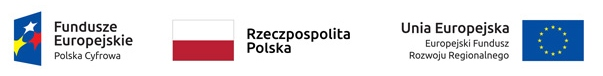</center>